
# 1.주제
신용카드 사용자 데이터를 보고 사용자의 대금 연체 정도를 예측하는 알고리즘 개발 



# 2. 배경
신용카드사는 신용카드 신청자가 제출한 개인정보와 데이터를 활용해 신용 점수를 산정합니다. 신용카드사는 이 신용 점수를 활용해 신청자의 향후 채무 불이행과 신용카드 대급 연체 가능성을 예측합니다. 
현재 많은 금융업계는 인공지능(AI)를 활용한 금융 서비스를 구현하고자 합니다. 사용자의 대금 연체 정도를 예측할 수 있는 인공지능 알고리즘을 개발해 금융업계에 제안할 수 있는 인사이트를 발굴해주세요!



# 3. 대회 설명
신용카드 사용자들의 개인 신상정보 데이터로 사용자의 신용카드 대금 연체 정도를 예측


In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, warnings
from itertools import combinations
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score
from sklearn.feature_selection import VarianceThreshold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
warnings.filterwarnings('ignore')
sns.set(style = 'whitegrid')
pd.set_option('display.max_columns', 50)
np.random.seed(2018)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [125]:
train.sort_values('income_total')

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ID,ID_TF,ID_n,ID_TF_n
6693,6693,F,N,N,0,27000.0,Working,Higher education,Civil marriage,House / apartment,-14869,-5067,1,0,0,Managers,2.0,-31.0,2.0,F & N & N & 0 & 27000.0 & Working & Higher edu...,False,F & N & N & 0 & 27000.0 & Working & Higher edu...,False
11224,11224,F,N,Y,0,27000.0,Working,Secondary / secondary special,Married,House / apartment,-19128,-1323,1,0,0,Security staff,2.0,-28.0,1.0,F & N & Y & 0 & 27000.0 & Working & Secondary ...,False,F & N & Y & 0 & 27000.0 & Working & Secondary ...,False
4797,4797,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20086,365243,0,0,0,NaN,2.0,-2.0,1.0,F & Y & Y & 0 & 29250.0 & Pensioner & Secondar...,True,F & Y & Y & 0 & 29250.0 & Pensioner & Secondar...,True
18054,18054,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20086,365243,0,0,0,NaN,2.0,-24.0,1.0,F & Y & Y & 0 & 29250.0 & Pensioner & Secondar...,True,F & Y & Y & 0 & 29250.0 & Pensioner & Secondar...,True
15900,15900,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20086,365243,0,0,0,NaN,2.0,-27.0,1.0,F & Y & Y & 0 & 29250.0 & Pensioner & Secondar...,True,F & Y & Y & 0 & 29250.0 & Pensioner & Secondar...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18445,18445,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10142,-2479,0,0,0,Managers,2.0,-6.0,2.0,F & Y & Y & 1 & 1575000.0 & Commercial associa...,True,F & Y & Y & 1 & 1575000.0 & Commercial associa...,True
10564,10564,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10142,-2479,0,0,0,Managers,2.0,-6.0,2.0,F & Y & Y & 1 & 1575000.0 & Commercial associa...,True,F & Y & Y & 1 & 1575000.0 & Commercial associa...,True
14702,14702,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10142,-2479,0,0,0,Managers,2.0,-39.0,2.0,F & Y & Y & 1 & 1575000.0 & Commercial associa...,True,F & Y & Y & 1 & 1575000.0 & Commercial associa...,True
15903,15903,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10142,-2479,0,0,0,Managers,2.0,-41.0,2.0,F & Y & Y & 1 & 1575000.0 & Commercial associa...,True,F & Y & Y & 1 & 1575000.0 & Commercial associa...,True


In [4]:
train = pd.read_csv('train.csv')

In [118]:
train.head(1)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,birth_emp,birth_emp_dup,ID,ID_TF
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,F & Commercial associate & -13899 & Higher edu...,False,F & N & N & 0 & 202500.0 & Commercial associat...,False


In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

<AxesSubplot:>

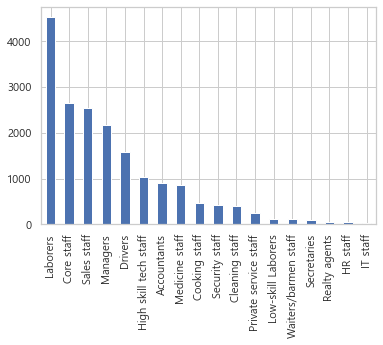

In [121]:
train['occyp_type'].value_counts().plot(kind='bar')

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
ID                  0
ID_TF               0
ID_n                0
ID_TF_n             0
dtype: int64

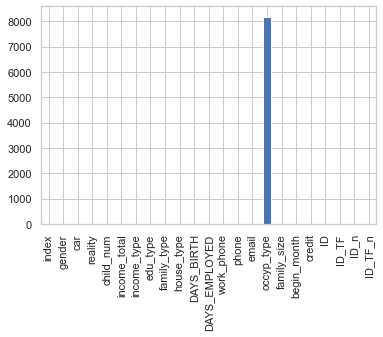

In [139]:
train.isna().sum().plot(kind = 'bar') #직업종류만 결측치 존재 어떤식으로 채울지 
train.isna().sum()


# 가설1. 업무폰이 있으면 필수인력임으로 income이 높고 credit 평가가 좋지 않을까?

-> 결론적으로는 상관없음 하지만 내가 본 것은 total train.
   중복값을 뺀 유저당 하나의 정보만 있는 train8000을 만들어 다시 평가해보자

In [22]:
#credit 별 고객 분포 0등급 : 12%, 1등급 : 24%, 2등급 : 34퍼
train['credit'].value_counts(normalize=True)

2.0    0.641343
1.0    0.236875
0.0    0.121783
Name: credit, dtype: float64

In [18]:
train['work_phone'].value_counts()

0    20511
1     5946
Name: work_phone, dtype: int64

In [30]:
print('-----전체 신용도별 카운트-----') #sc: 꽤 상관성이 있는듯 보여 corr확인해봤는데...그렇게 높지는 않게 나왔다
print(train['credit'].value_counts(normalize=False))
print('-----전체 신용도별 비율-----')
print(train['credit'].value_counts(normalize=True))
print('-----업무폰 있는 사람 신용도별 카운트-----')
print(train.query('work_phone == 1')['credit'].value_counts(normalize=False))
print('-----업무폰 있는 사람 신용도별 비율-----')
print(train.query('work_phone == 1')['credit'].value_counts(normalize=True))
print('-----업무폰 없는 사람 신용도별 카운트-----')
print(train.query('work_phone == 0')['credit'].value_counts(normalize=False))
print('-----업무폰 없는 사람 신용도별 비율-----')
print(train.query('work_phone == 0')['credit'].value_counts(normalize=True))


-----전체 신용도별 카운트-----
2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64
-----전체 신용도별 비율-----
2.0    0.641343
1.0    0.236875
0.0    0.121783
Name: credit, dtype: float64
-----업무폰 있는 사람 신용도별 카운트-----
2.0    3794
1.0    1423
0.0     729
Name: credit, dtype: int64
-----업무폰 있는 사람 신용도별 비율-----
2.0    0.638076
1.0    0.239321
0.0    0.122603
Name: credit, dtype: float64
-----업무폰 없는 사람 신용도별 카운트-----
2.0    13174
1.0     4844
0.0     2493
Name: credit, dtype: int64
-----업무폰 없는 사람 신용도별 비율-----
2.0    0.642290
1.0    0.236166
0.0    0.121545
Name: credit, dtype: float64


In [19]:
#신용도별 업무폰 비율
print(train.query('credit == 0')['work_phone'].value_counts(normalize=True))
print(train.query('credit == 1')['work_phone'].value_counts(normalize=True))
print(train.query('credit == 2')['work_phone'].value_counts(normalize=True))

0    0.773743
1    0.226257
Name: work_phone, dtype: float64
0    0.772938
1    0.227062
Name: work_phone, dtype: float64
0    0.776403
1    0.223597
Name: work_phone, dtype: float64


In [56]:

print(train.query('credit == 0 & work_phone == 1')['income_total'].mean())
print(train.query('credit == 0 & work_phone == 0')['income_total'].mean())

177310.67283950618
194754.3321299639


In [12]:
all = train['credit'].value_counts(normalize=True)
workphone1 = train.query('work_phone == 1')['credit'].value_counts(normalize=True)
workphone0 = train.query('work_phone == 0')['credit'].value_counts(normalize=True)

sibak = pd.DataFrame([all]+[workphone1]+[workphone0])
sibak.index=['all', 'workphone 있음','workphone 없음']
sibak

,2.0,1.0,0.0
all,0.641343,0.236875,0.121783
workphone 있음,0.638076,0.239321,0.122603
workphone 없음,0.642290,0.236166,0.121545


In [1]:
sibak.plot(kind= 'bar',rot=45)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

NameError: name 'sibak' is not defined

In [27]:
train.corr()
workphone = pd.DataFrame({'all' : [all], 'workphone1' : [workphone1] , 'workphone0' : [workphone0]})

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
index,1.000000,0.001012,0.009848,-0.008901,0.004259,NaN,-0.005575,-0.001790,0.005332,-0.002867,0.002181,-0.007841
child_num,0.001012,1.000000,0.032186,0.332816,-0.228159,NaN,0.051521,-0.010555,0.016120,0.890530,-0.007229,0.004081
income_total,0.009848,0.032186,1.000000,0.064155,-0.166478,NaN,-0.034207,0.019013,0.089882,0.023839,-0.018047,0.008555
DAYS_BIRTH,-0.008901,0.332816,0.064155,1.000000,-0.616776,NaN,0.178752,-0.029247,0.111238,0.298108,0.057306,-0.025187
DAYS_EMPLOYED,0.004259,-0.228159,-0.166478,-0.616776,1.000000,NaN,-0.241827,-0.007749,-0.091090,-0.223077,0.007964,-0.003798
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_phone,-0.005575,0.051521,-0.034207,0.178752,-0.241827,NaN,1.000000,0.310256,-0.031048,0.068705,-0.008563,-0.003134
phone,-0.001790,-0.010555,0.019013,-0.029247,-0.007749,NaN,0.310256,1.000000,0.012494,-0.000132,-0.014286,0.003452
email,0.005332,0.016120,0.089882,0.111238,-0.091090,NaN,-0.031048,0.012494,1.000000,0.016122,0.002320,0.014812
family_size,-0.002867,0.890530,0.023839,0.298108,-0.223077,NaN,0.068705,-0.000132,0.016122,1.000000,-0.023032,0.008227


# 가설 2. 개인정보다 동일한 사람은 동일인물이지 않을까?
#### 개인정보를 나열해 하나의 칼럼으로 생성 후 첫 번째 행만 가져와 고객 리스트로 재생성
#### 8759 USER만 골라냄

In [123]:
train['ID_n'] = train['gender'].astype(str) + ' & ' + train['car'].astype(str) + ' & ' + train['reality'].astype(str) + ' & ' + \
                train['child_num'].astype(str) + ' & ' + train['income_total'].astype(str) + ' & ' + train['income_type'].astype(str) + ' & ' + \
                    train['edu_type'].astype(str) + ' & ' + train['family_type'].astype(str) + ' & ' + train['house_type'].astype(str) + ' & ' + \
                        train['DAYS_BIRTH'].astype(str) + ' & ' + train['DAYS_EMPLOYED'].astype(str) + ' & ' + train['work_phone'].astype(str) + ' & ' + \
                            train['phone'].astype(str) + ' & ' + train['email'].astype(str) + ' & ' + train['occyp_type'].astype(str) + ' & ' + train['family_size'].astype(str) + ' & ' + train['credit'].astype(str) 
                            
ID_n = train.duplicated(['ID_n'])
train['ID_TF_n'] = ID_n

print(train['ID_n'].unique().shape)
train

(12099,)


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ID,ID_TF,ID_n,ID_TF_n
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0,-6.0,1.0,F & N & N & 0 & 202500.0 & Commercial associat...,False,F & N & N & 0 & 202500.0 & Commercial associat...,False
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3.0,-5.0,1.0,F & N & Y & 1 & 247500.0 & Commercial associat...,False,F & N & Y & 1 & 247500.0 & Commercial associat...,False
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,2.0,-22.0,2.0,M & Y & Y & 0 & 450000.0 & Working & Higher ed...,False,M & Y & Y & 0 & 450000.0 & Working & Higher ed...,False
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2.0,-37.0,0.0,F & N & Y & 0 & 202500.0 & Commercial associat...,False,F & N & Y & 0 & 202500.0 & Commercial associat...,False
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2.0,-26.0,2.0,F & Y & Y & 0 & 157500.0 & State servant & Hig...,False,F & Y & Y & 0 & 157500.0 & State servant & Hig...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,0,0,0,Core staff,4.0,-2.0,1.0,F & N & N & 2 & 225000.0 & State servant & Sec...,True,F & N & N & 2 & 225000.0 & State servant & Sec...,False
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,0,0,0,NaN,2.0,-47.0,2.0,F & N & Y & 1 & 180000.0 & Working & Higher ed...,False,F & N & Y & 1 & 180000.0 & Working & Higher ed...,False
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,0,0,0,Core staff,2.0,-25.0,2.0,F & Y & N & 0 & 292500.0 & Working & Secondary...,False,F & Y & N & 0 & 292500.0 & Working & Secondary...,False
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,0,0,0,Laborers,1.0,-59.0,2.0,M & N & Y & 0 & 171000.0 & Working & Incomplet...,False,M & N & Y & 0 & 171000.0 & Working & Incomplet...,False


In [4]:
#개인정보를 나열한 칼럼 ID 추가
train['ID'] = train['gender'].astype(str) + ' & ' + train['car'].astype(str) + ' & ' + train['reality'].astype(str) + ' & ' + \
                train['child_num'].astype(str) + ' & ' + train['income_total'].astype(str) + ' & ' + train['income_type'].astype(str) + ' & ' + \
                    train['edu_type'].astype(str) + ' & ' + train['family_type'].astype(str) + ' & ' + train['house_type'].astype(str) + ' & ' + \
                        train['DAYS_BIRTH'].astype(str) + ' & ' + train['DAYS_EMPLOYED'].astype(str) + ' & ' + train['work_phone'].astype(str) + ' & ' + \
                            train['phone'].astype(str) + ' & ' + train['email'].astype(str) + ' & ' + train['occyp_type'].astype(str) + ' & ' + train['credit'].astype(str) 
#쓸모없는 칼럼 삭제
#train.drop(['FLAG_MOBIL'], axis=1, inplace=True)   
#user_list = user_list.drop(columns=['index']) #칼럼 달아줘야지 칼럼 내 인덱스 삭제됨 아니면 제일 앞 인덱스 삭제되서 내용까지 싹 날아감

#ID칼럼 중복 확인
ID = train.duplicated(['ID'])

#TrueFalse 칼럼 train에 추가
train['ID_TF'] = ID

#unique로 user 수 확인 : 8759                
print(train['ID'].unique().shape)
train.head(1)

(8759,)


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ID,ID_TF
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,F & N & N & 0 & 202500.0 & Commercial associat...,False


In [5]:
#8759만 추출한 데이터프레임
user_list = train.query('ID_TF == False')

#칼럼이름 변경 index -> user no
#user_list.rename(columns = {'index':'user no.'}, inplace = True) 

#reset index
user_list = user_list.reset_index(inplace=False)
#
# user_list.drop(['user no.'] , axis=1, inplace=True)

In [70]:
#query 함수 사용을 위해 숫자로 바꿔줌 car, reality, y=1 n=0 male=0 female=1
user_list['car'] = user_list['car'].replace('Y', 1)
user_list['car'] = user_list['car'].replace('N', 0)
user_list['reality'] = user_list['reality'].replace('Y', 1)
user_list['reality'] = user_list['reality'].replace('N', 0)
user_list['gender'] = user_list['gender'].replace('F', 1)
user_list['gender'] = user_list['gender'].replace('M', 0)

In [301]:
user_list

,level_0,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ID,ID_TF
0,0,0,1,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0,-6.0,1.0,F & N & N & 0 & 202500.0 & Commercial associat...,False
1,1,1,1,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3.0,-5.0,1.0,F & N & Y & 1 & 247500.0 & Commercial associat...,False
2,2,2,0,1,1,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,2.0,-22.0,2.0,M & Y & Y & 0 & 450000.0 & Working & Higher ed...,False
3,3,3,1,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2.0,-37.0,0.0,F & N & Y & 0 & 202500.0 & Commercial associat...,False
4,4,4,1,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2.0,-26.0,2.0,F & Y & Y & 0 & 157500.0 & State servant & Hig...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,26450,26450,1,0,0,0,225000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-10338,-581,0,1,0,Laborers,1.0,-37.0,2.0,F & N & N & 0 & 225000.0 & Commercial associat...,False
8755,26453,26453,1,0,1,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,0,0,0,NaN,2.0,-47.0,2.0,F & N & Y & 1 & 180000.0 & Working & Higher ed...,False
8756,26454,26454,1,1,0,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,0,0,0,Core staff,2.0,-25.0,2.0,F & Y & N & 0 & 292500.0 & Working & Secondary...,False
8757,26455,26455,0,0,1,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,0,0,0,Laborers,1.0,-59.0,2.0,M & N & Y & 0 & 171000.0 & Working & Incomplet...,False


In [130]:
user_list.corr()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit,birth_emp_dup,ID_TF
index,1.000000,0.001932,-0.017354,0.009242,0.000021,NaN,-0.008070,-0.019007,0.004953,-0.013372,0.030361,0.016149,0.084405,NaN
child_num,0.001932,1.000000,0.028051,0.316656,-0.221977,NaN,0.052035,-0.025482,0.006504,0.890915,-0.007044,0.000892,0.009899,NaN
income_total,-0.017354,0.028051,1.000000,0.062721,-0.165275,NaN,-0.031548,0.018846,0.093928,0.025275,-0.025934,0.001008,-0.000777,NaN
DAYS_BIRTH,0.009242,0.316656,0.062721,1.000000,-0.612470,NaN,0.180248,-0.047711,0.107304,0.270249,0.072151,-0.020117,-0.020564,NaN
DAYS_EMPLOYED,0.000021,-0.221977,-0.165275,-0.612470,1.000000,NaN,-0.241049,0.002090,-0.078456,-0.210206,-0.003539,-0.001207,0.030004,NaN
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_phone,-0.008070,0.052035,-0.031548,0.180248,-0.241049,NaN,1.000000,0.286946,-0.038403,0.062115,0.006787,-0.015583,-0.009046,NaN
phone,-0.019007,-0.025482,0.018846,-0.047711,0.002090,NaN,0.286946,1.000000,0.007023,-0.013278,-0.007813,-0.003806,0.006701,NaN
email,0.004953,0.006504,0.093928,0.107304,-0.078456,NaN,-0.038403,0.007023,1.000000,0.002090,0.005527,0.010775,-0.010753,NaN
family_size,-0.013372,0.890915,0.025275,0.270249,-0.210206,NaN,0.062115,-0.013278,0.002090,1.000000,-0.016856,0.002125,-0.009951,NaN


In [154]:
#user_list로 work_phone 과 credit 상관도 확인 
print('-----전체 신용도별 카운트-----') #sc: 0.01퍼만큼...영향력있다네....ㅋ
print(user_list['credit'].value_counts(normalize=False))
print('-----전체 신용도별 비율-----')
print(user_list['credit'].value_counts(normalize=True))
print('-----업무폰 있는 사람 신용도별 카운트-----')
print(user_list.query('work_phone == 1')['credit'].value_counts(normalize=False))
print('-----업무폰 있는 사람 신용도별 비율-----')
print(user_list.query('work_phone == 1')['credit'].value_counts(normalize=True))
print('-----업무폰 없는 사람 신용도별 카운트-----')
print(user_list.query('work_phone == 0')['credit'].value_counts(normalize=False))
print('-----업무폰 없는 사람 신용도별 비율-----')
print(user_list.query('work_phone == 0')['credit'].value_counts(normalize=True))

-----전체 신용도별 카운트-----
2.0    5817
1.0    1911
0.0    1031
Name: credit, dtype: int64
-----전체 신용도별 비율-----
2.0    0.664117
1.0    0.218176
0.0    0.117708
Name: credit, dtype: float64
-----업무폰 있는 사람 신용도별 카운트-----
2.0    1241
1.0     434
0.0     236
Name: credit, dtype: int64
-----업무폰 있는 사람 신용도별 비율-----
2.0    0.649398
1.0    0.227106
0.0    0.123496
Name: credit, dtype: float64
-----업무폰 없는 사람 신용도별 카운트-----
2.0    4576
1.0    1477
0.0     795
Name: credit, dtype: int64
-----업무폰 없는 사람 신용도별 비율-----
2.0    0.668224
1.0    0.215683
0.0    0.116092
Name: credit, dtype: float64


In [16]:
sns.countplot(x='credit', data = user_list, hue= 'family_type')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

NameError: name 'user_list' is not defined

In [165]:
#미세하지만 자녀가 있는 가족의 credit3 비율이 낮다
print('-----------자녀 0 카운트------------')
print('자식이 없는 user :', user_list.query('child_num == 0')['credit'].count())
print(user_list.query('child_num == 0')['credit'].value_counts(normalize=False))
print('-----------자녀 0 비율------------')
print(user_list.query('child_num == 0')['credit'].value_counts(normalize=True))
print('-----------자녀 1 카운트------------')
print('자식이 있는 user :', user_list.query('child_num > 0')['credit'].count())
print(user_list.query('child_num > 0')['credit'].value_counts(normalize=False))
print('-----------자녀 1이상 비율------------')
print(user_list.query('child_num > 0')['credit'].value_counts(normalize=True))

-----------자녀 0 카운트------------
자식이 없는 user : 6144
2.0    4098
1.0    1319
0.0     727
Name: credit, dtype: int64
-----------자녀 0 비율------------
2.0    0.666992
1.0    0.214681
0.0    0.118327
Name: credit, dtype: float64
-----------자녀 1 카운트------------
자식이 있는 user : 2615
2.0    1719
1.0     592
0.0     304
Name: credit, dtype: int64
-----------자녀 1이상 비율------------
2.0    0.657361
1.0    0.226386
0.0    0.116252
Name: credit, dtype: float64


In [172]:
def a(p):
    print('자녀가 있는 user :', user_list.query('family_size > 1')[p].count())
    print(user_list.query('family_size > 1')['credit'].value_counts(normalize=True))

In [174]:
a('credit')

자녀가 있는 user : 6995
2.0    0.667906
1.0    0.212723
0.0    0.119371
Name: credit, dtype: float64


In [ ]:
dataset_dropna_1 = dataset.loc[(dataset['시도구분'] != '모름') &
                               (dataset['시도구분'] != '서울') &  \
                               (dataset['시도구분'] != '경기')]

In [14]:
def b(p): #이건 왜 안돼....물어보기###########됐다!!앞에 f 붙여야함#############################################
    print('자녀가 있는 user :', train.query(f'family_size > {p}')['credit'].count())
    print(train.query('family_size > 1')['credit'].value_counts(normalize=True))

In [15]:
b(1)

자녀가 있는 user : 21348
2.0    0.645587
1.0    0.231825
0.0    0.122588
Name: credit, dtype: float64


In [184]:
child_non0= user_list.query('child_num > 0')

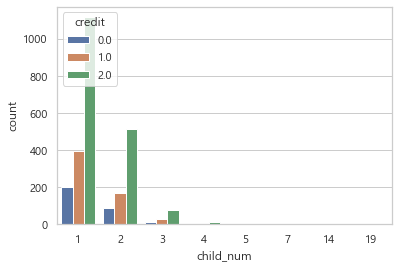

In [185]:
sns.countplot('child_num', data = child_non0, hue= 'credit')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show()

In [188]:
print(train['credit'].value_counts(normalize = True))
print(user_list['credit'].value_counts(normalize = True))

2.0    0.641343
1.0    0.236875
0.0    0.121783
Name: credit, dtype: float64
2.0    0.664117
1.0    0.218176
0.0    0.117708
Name: credit, dtype: float64


In [9]:
print('자녀수 0 수:', user_list.query('child_num == 0')['credit'].count())
print('자녀수 0 비율 :',user_list.query('child_num == 0')['credit'].value_counts(normalize=True))
print('자녀 有 수:', user_list.query('child_num > 0')['credit'].count())
print('자녀 有 0 비율 :',user_list.query('child_num > 0')['credit'].value_counts(normalize=True))
print('자녀수 1 수:', user_list.query('child_num == 1')['credit'].count())
print('자녀수 1 비율 :',user_list.query('child_num == 1')['credit'].value_counts(normalize=True))
print('자녀수 2 수:', user_list.query('child_num == 2')['credit'].count())
print('자녀수 2 비율 :',user_list.query('child_num == 2')['credit'].value_counts(normalize=True))
print('자녀수 3 수:', user_list.query('child_num == 3')['credit'].count())
print('자녀수 3 비율 :',user_list.query('child_num == 3')['credit'].value_counts(normalize=True))
print('자녀수 4 수:', user_list.query('child_num == 4')['credit'].count())
print('자녀수 4 비율 :',user_list.query('child_num == 4')['credit'].value_counts(normalize=True))
print('자녀수 5 수:', user_list.query('child_num == 5')['credit'].count())
print('자녀수 5 비율 :',user_list.query('child_num == 5')['credit'].value_counts(normalize=True))
print('자녀수 7 수:', user_list.query('child_num == 7')['credit'].count())
print('자녀수 7 비율 :',user_list.query('child_num == 5')['credit'].value_counts(normalize=True))
print('자녀수 14 수:', user_list.query('child_num == 14')['credit'].count())
print('자녀수 14 비율 :',user_list.query('child_num == 14')['credit'].value_counts(normalize=True))
print('자녀수 19 수:', user_list.query('child_num == 19')['credit'].count())
print('자녀수 19 비율 :',user_list.query('child_num == 19')['credit'].value_counts(normalize=True))


자녀수 0 수: 6144
자녀수 0 비율 : 2.0    0.666992
1.0    0.214681
0.0    0.118327
Name: credit, dtype: float64
자녀 有 수: 2615
자녀 有 0 비율 : 2.0    0.657361
1.0    0.226386
0.0    0.116252
Name: credit, dtype: float64
자녀수 1 수: 1708
자녀수 1 비율 : 2.0    0.652810
1.0    0.229508
0.0    0.117681
Name: credit, dtype: float64
자녀수 2 수: 769
자녀수 2 비율 : 2.0    0.667100
1.0    0.219766
0.0    0.113134
Name: credit, dtype: float64
자녀수 3 수: 116
자녀수 3 비율 : 2.0    0.655172
1.0    0.232759
0.0    0.112069
Name: credit, dtype: float64
자녀수 4 수: 16
자녀수 4 비율 : 2.0    0.6250
0.0    0.1875
1.0    0.1875
Name: credit, dtype: float64
자녀수 5 수: 3
자녀수 5 비율 : 2.0    0.666667
1.0    0.333333
Name: credit, dtype: float64
자녀수 7 수: 1
자녀수 7 비율 : 2.0    0.666667
1.0    0.333333
Name: credit, dtype: float64
자녀수 14 수: 1
자녀수 14 비율 : 2.0    1.0
Name: credit, dtype: float64
자녀수 19 수: 1
자녀수 19 비율 : 2.0    1.0
Name: credit, dtype: float64


In [186]:
user_list['child_num'].sort_values().value_counts() #<- 정보가 정확하지 않을 가능성....?

0     6144
1     1708
2      769
3      116
4       16
5        3
7        1
14       1
19       1
Name: child_num, dtype: int64

In [276]:
user_list.columns

Index(['level_0', 'index', 'gender', 'car', 'reality', 'child_num',
       'income_total', 'income_type', 'edu_type', 'family_type', 'house_type',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit', 'ID', 'ID_TF'],
      dtype='object')

In [17]:
user_list.query('car == 1 &  reality == 1')['credit'].value_counts(normalize=True)

2.0    0.668840
1.0    0.218444
0.0    0.112715
Name: credit, dtype: float64

In [20]:
user_list.query('car == 1 & reality ==1')['edu_type'].value_counts()

Secondary / secondary special    1366
Higher education                  675
Incomplete higher                  87
Lower secondary                    16
Academic degree                     3
Name: edu_type, dtype: int64

In [33]:
train['edu_type'].value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

In [31]:
user_list.query('credit == 0')['edu_type'].value_counts(normalize=True)


Secondary / secondary special    0.669253
Higher education                 0.286130
Incomplete higher                0.033948
Lower secondary                  0.010669
Name: edu_type, dtype: float64

In [35]:
user_list.query('credit == 1')['edu_type'].value_counts(normalize=True)


Secondary / secondary special    0.682889
Higher education                 0.259550
Incomplete higher                0.043956
Lower secondary                  0.013082
Academic degree                  0.000523
Name: edu_type, dtype: float64

In [37]:
user_list.query('credit == 2')['edu_type'].value_counts(normalize=True)

Secondary / secondary special    0.700533
Higher education                 0.250645
Incomplete higher                0.036961
Lower secondary                  0.011002
Academic degree                  0.000860
Name: edu_type, dtype: float64

In [281]:
user_list['edu_type'].values

array(['Higher education', 'Secondary / secondary special',
       'Higher education', ..., 'Secondary / secondary special',
       'Incomplete higher', 'Secondary / secondary special'], dtype=object)

In [47]:
user_list.to_csv('user_list1.csv')

In [ ]:
train.loc[(train['car'] == 'Y') & (train['reality'] == 'Y') &  (train['child_num'] == 0)]

In [72]:
user_list.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'occyp_type', 'family_size',
       'begin_month', 'credit', 'ID', 'ID_TF'],
      dtype='object')

In [95]:
26*2.5 /21

3.0952380952380953

In [114]:
train['DAYS_BIRTH'].sort_values

<bound method Series.sort_values of 0       -13899
1       -11380
2       -19087
3       -15088
4       -15037
         ...  
26452   -12079
26453   -15291
26454   -10082
26455   -10145
26456   -19569
Name: DAYS_BIRTH, Length: 26457, dtype: int64>

In [102]:
user_list['DAYS_BIRTH'] = user_list['DAYS_BIRTH'].abs()

In [103]:
user_list

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ID,ID_TF
0,1,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,-4709,0,0,0,NaN,2.0,-6.0,1.0,F & N & N & 0 & 202500.0 & Commercial associat...,False
1,1,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,-1540,0,0,1,Laborers,3.0,-5.0,1.0,F & N & Y & 1 & 247500.0 & Commercial associat...,False
2,0,1,1,0,450000.0,Working,Higher education,Married,House / apartment,19087,-4434,0,1,0,Managers,2.0,-22.0,2.0,M & Y & Y & 0 & 450000.0 & Working & Higher ed...,False
3,1,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,-2092,0,1,0,Sales staff,2.0,-37.0,0.0,F & N & Y & 0 & 202500.0 & Commercial associat...,False
4,1,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,15037,-2105,0,0,0,Managers,2.0,-26.0,2.0,F & Y & Y & 0 & 157500.0 & State servant & Hig...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,1,0,0,0,225000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,10338,-581,0,1,0,Laborers,1.0,-37.0,2.0,F & N & N & 0 & 225000.0 & Commercial associat...,False
8755,1,0,1,1,180000.0,Working,Higher education,Separated,House / apartment,15291,-2475,0,0,0,NaN,2.0,-47.0,2.0,F & N & Y & 1 & 180000.0 & Working & Higher ed...,False
8756,1,1,0,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,10082,-2015,0,0,0,Core staff,2.0,-25.0,2.0,F & Y & N & 0 & 292500.0 & Working & Secondary...,False
8757,0,0,1,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,10145,-107,0,0,0,Laborers,1.0,-59.0,2.0,M & N & Y & 0 & 171000.0 & Working & Incomplet...,False


# 가설 3. 개인정보는 똑같은데 credit 이 다른 정보들은 정보 업데이트가 되지않은 것으로 간주
###         가장 최근에 카드 발급받은 begin month 기준을 업데이트 된 정보로 user list 뽑고 카드 개수 뽑기

In [2]:
user_list.loc[(user_list['credit'] == 0)].sort_values('income_total').head(1)

NameError: name 'user_list' is not defined

In [118]:
user_list['ID'].head(1)

0    F & N & N & 0 & 202500.0 & Commercial associat...
Name: ID, dtype: object

In [130]:
train.head(1)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ID,ID_TF,ID_n,ID_TF_n
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0,-6.0,1.0,F & N & N & 0 & 202500.0 & Commercial associat...,False,F & N & N & 0 & 202500.0 & Commercial associat...,False


In [128]:
train['begin_month'].sort_values()

15293   -60.0
9529    -60.0
16134   -60.0
11972   -60.0
3953    -60.0
         ... 
20798     0.0
18484     0.0
8679      0.0
22710     0.0
17006     0.0
Name: begin_month, Length: 26457, dtype: float64

In [133]:
sub = train

In [138]:
sub.sort_values(by = ['ID_n', 'begin_month'], ascending = [False, True])
sub.head()
#df.sort_values(by=["c1", "c2"], ascending=[False, True]) 

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ID,ID_TF,ID_n,ID_TF_n
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0,-6.0,1.0,F & N & N & 0 & 202500.0 & Commercial associat...,False,F & N & N & 0 & 202500.0 & Commercial associat...,False
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3.0,-5.0,1.0,F & N & Y & 1 & 247500.0 & Commercial associat...,False,F & N & Y & 1 & 247500.0 & Commercial associat...,False
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,2.0,-22.0,2.0,M & Y & Y & 0 & 450000.0 & Working & Higher ed...,False,M & Y & Y & 0 & 450000.0 & Working & Higher ed...,False
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2.0,-37.0,0.0,F & N & Y & 0 & 202500.0 & Commercial associat...,False,F & N & Y & 0 & 202500.0 & Commercial associat...,False
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2.0,-26.0,2.0,F & Y & Y & 0 & 157500.0 & State servant & Hig...,False,F & Y & Y & 0 & 157500.0 & State servant & Hig...,False


In [ ]:
#개인정보를 나열한 칼럼 ID 추가
train['ID'] = train['gender'].astype(str) + ' & ' + train['car'].astype(str) + ' & ' + train['reality'].astype(str) + ' & ' + \
                train['child_num'].astype(str) + ' & ' + train['income_total'].astype(str) + ' & ' + train['income_type'].astype(str) + ' & ' + \
                    train['edu_type'].astype(str) + ' & ' + train['family_type'].astype(str) + ' & ' + train['house_type'].astype(str) + ' & ' + \
                        train['DAYS_BIRTH'].astype(str) + ' & ' + train['DAYS_EMPLOYED'].astype(str) + ' & ' + train['work_phone'].astype(str) + ' & ' + \
                            train['phone'].astype(str) + ' & ' + train['email'].astype(str) + ' & ' + train['occyp_type'].astype(str) + ' & ' + train['family_size'].astype(str)

#쓸모없는 칼럼 삭제
train.drop(['FLAG_MOBIL'], axis=1, inplace=True)   
train.drop(columns=['index'], inplace=True)

train = train.sort_values(['begin_month', 'ID'], ascending=[False, True])

ID = train.duplicated(['ID'])
train['ID_TF'] = ID
train['ID_TF'].value_counts()

for i in tqdm(range(len(train['ID'].unique()))):
    a = train.iloc[i]['ID']
    b = len(train[train['ID']==a])
    train.loc[(train['ID']==a), 'card_num'] =  b

#ID칼럼 중복 확인
ID = train.duplicated(['ID'])

#TrueFalse 칼럼 train에 추가
train['ID_TF'] = ID

#unique로 user 수 확인 : 8759                
print(train['ID'].unique().shape)
# train.head(1)
# train.head(1)['ID']
train['ID_TF'].value_counts()


#8759만 추출한 데이터프레임
user_list = train.query('ID_TF == False')

#reset index
user_list = user_list.reset_index(inplace=False)
user_list.drop(columns='index', inplace=True)


user_list

In [10]:
train = pd.read_csv('train.csv')
train['ID'] = train['gender'].astype(str) + ' & ' + train['car'].astype(str) + ' & ' + train['reality'].astype(str) + ' & ' + \
                train['child_num'].astype(str) + ' & ' + train['income_total'].astype(str) + ' & ' + train['income_type'].astype(str) + ' & ' + \
                    train['edu_type'].astype(str) + ' & ' + train['family_type'].astype(str) + ' & ' + train['house_type'].astype(str) + ' & ' + \
                        train['DAYS_BIRTH'].astype(str) + ' & ' + train['DAYS_EMPLOYED'].astype(str) + ' & ' + train['work_phone'].astype(str) + ' & ' + \
                            train['phone'].astype(str) + ' & ' + train['email'].astype(str)  + ' & ' + train['family_size'].astype(str)
#쓸모없는 칼럼 삭제
train.drop(['FLAG_MOBIL'], axis=1, inplace=True)   
train.drop(columns=['index'], inplace=True)

In [ ]:
#카드 num 달기
for i in tqdm(range(len(train['ID'].unique()))):
    a = train.iloc[i]['ID']
    b = len(train[train['ID']==a])
    train.loc[(train['ID']==a), 'card_num'] =  b

In [11]:
#
for i in tqdm(range(len(train))):
    a = train.iloc[i]['ID']
    b = abs(int(train[train['ID']==a]['begin_month'].mean()))
    user_list.loc[(user_list['ID']==a), 'begin_month_mean'] =  b

100%|██████████| 26457/26457 [01:25<00:00, 308.70it/s]


In [12]:
user_list

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ID,card_num,age,work_year,begin_month_mean
0,F,N,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,With parents,-11453,-277,0,0,0,Medicine staff,2.0,0.0,1.0,F & N & N & 0 & 112500.0 & Commercial associat...,1.0,31.0,1.0,0.0
1,F,N,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-15499,-869,0,0,0,Private service staff,2.0,0.0,0.0,F & N & N & 0 & 135000.0 & Working & Secondary...,5.0,42.0,2.0,0.0
2,F,N,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-19003,-11785,0,0,0,Medicine staff,2.0,0.0,0.0,F & N & N & 0 & 135000.0 & Working & Secondary...,2.0,52.0,32.0,0.0
3,F,N,N,0,135000.0,Working,Secondary / secondary special,Married,With parents,-12278,-869,0,0,0,NaN,2.0,0.0,0.0,F & N & N & 0 & 135000.0 & Working & Secondary...,8.0,34.0,2.0,0.0
4,F,N,N,0,157500.0,State servant,Higher education,Married,House / apartment,-11588,-801,1,1,0,Core staff,2.0,0.0,0.0,F & N & N & 0 & 157500.0 & State servant & Hig...,9.0,32.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,M,Y,N,3,360000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15262,-1674,0,0,0,Managers,5.0,-60.0,2.0,M & Y & N & 3 & 360000.0 & Commercial associat...,1.0,42.0,5.0,60.0
8755,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-12167,-705,1,0,0,Drivers,2.0,-60.0,2.0,M & Y & Y & 0 & 112500.0 & Working & Secondary...,1.0,33.0,2.0,60.0
8756,M,Y,Y,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17847,-5331,0,0,0,Laborers,2.0,-60.0,0.0,M & Y & Y & 0 & 270000.0 & Commercial associat...,1.0,49.0,15.0,60.0
8757,M,Y,Y,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-18661,-1265,0,0,0,Managers,2.0,-60.0,2.0,M & Y & Y & 0 & 315000.0 & Commercial associat...,1.0,51.0,3.0,60.0


# 가설 3. 나이가 많고 재산이 많을수록 신용도가 좋을 것이다.

In [3]:
train = pd.read_csv('train_1020.csv')
user_list = pd.read_csv('user_list_1020.csv',index_col = 0) #언네임드 제거

In [16]:
user_list.head(1)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ID,card_num
0,F,N,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,With parents,-11453,-277,0,0,0,Medicine staff,2.0,0.0,1.0,F & N & N & 0 & 112500.0 & Commercial associat...,1.0


In [4]:
#0 혹은 양수값이 없음을 확인 후  절대값처리 후 365 나눠줌
#train['DAYS_BIRTH'].value_counts()
#train['age'] = train['DAYS_BIRTH'].abs()/365
#train['age'] = train['age'].round()
#train['age']
#train['age'].value_counts() #중장년층이 많음을 알 수 있음 35~55

user_list['age'] = user_list['DAYS_BIRTH'].abs()/365
user_list['age'] = user_list['age'].round()
user_list['age']
user_list['age'].value_counts().head(2)

41.0    267
37.0    266
Name: age, dtype: int64

In [5]:
#워킹일자 0보다 큰 값은 무효값으로 양수 전부 0으로 처리 
user_list['DAYS_EMPLOYED'] = user_list['DAYS_EMPLOYED'].replace(365243, 0)
user_list['DAYS_EMPLOYED'].sort_values().value_counts()
user_list.query('DAYS_EMPLOYED < 0')['DAYS_EMPLOYED'].sort_values()

#절대갑 처리 후 365 나눠 워킹연도 칼럼 생성
user_list['work_year'] = user_list['DAYS_EMPLOYED'].abs()/365
user_list['work_year'] = user_list['work_year'].round()
user_list['work_year'].value_counts().sort_index()

0.0     1767
1.0      890
2.0      764
3.0      750
4.0      655
5.0      579
6.0      467
7.0      422
8.0      379
9.0      317
10.0     281
11.0     201
12.0     169
13.0     148
14.0     125
15.0     169
16.0      80
17.0      70
18.0      57
19.0      66
20.0      55
21.0      49
22.0      41
23.0      34
24.0      34
25.0      27
26.0      27
27.0      18
28.0      23
29.0      17
30.0      13
31.0      11
32.0       9
33.0      11
34.0       9
35.0       6
36.0       4
37.0       1
38.0       3
39.0       2
40.0       3
41.0       4
43.0       2
Name: work_year, dtype: int64

In [186]:
train.shape

(8759, 22)

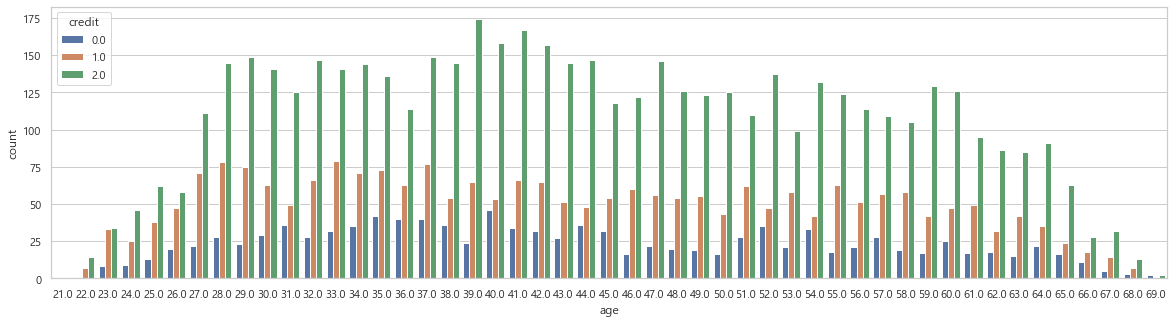

In [185]:
sns.countplot('age', data = user_list, hue= 'credit')
#plt.figure(figsize = (10,3))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 20,5 #countplot은 이렇게 figsize 조정 

plt.show()

<AxesSubplot:>

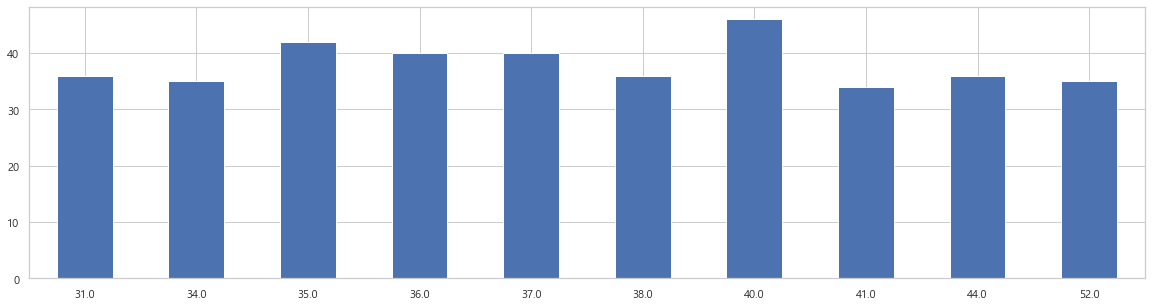

In [203]:
#크레딧 0 많은 나이 top 10 : 30대 중후반 
user_list.query('credit == 0')['age'].value_counts().head(10).sort_index().plot(kind = 'bar', rot=0)
#user_list.query('credit == 0')['age'].value_counts(normalize=True).head(10).sort_index().plot(kind = 'bar', rot=0)


<AxesSubplot:>

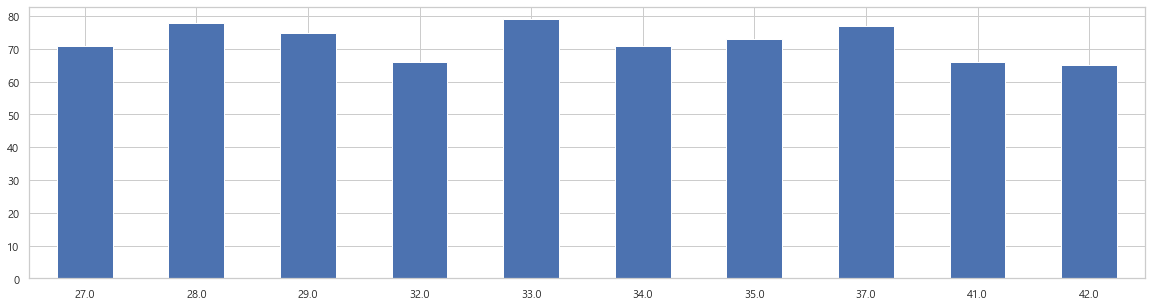

In [198]:
#크레딧 1이 많은 나이 top 10 : 20대 후반 30대 초 40대초
user_list.query('credit == 1')['age'].value_counts().head(10).sort_index().plot(kind = 'bar', rot=0)

<AxesSubplot:>

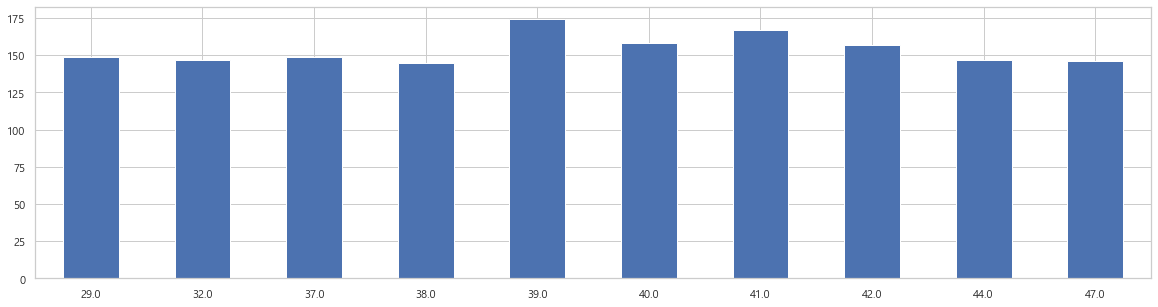

In [200]:

user_list.query('credit == 2')['age'].value_counts().head(10).sort_index().plot(kind = 'bar', rot=0)

<AxesSubplot:>

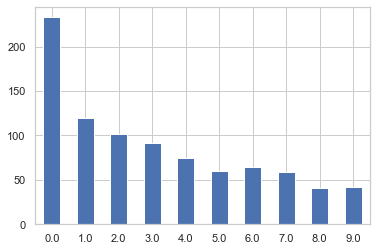

In [57]:
user_list.query('credit == 0')['work_year'].value_counts().head(10).sort_index().plot(kind = 'bar', rot=0)

<AxesSubplot:>

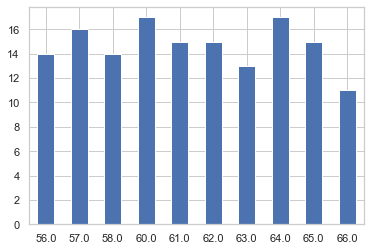

In [61]:
user_list.query('credit == 0 & work_year == 0')['age'].value_counts().head(10).sort_index().plot(kind = 'bar', rot=0)

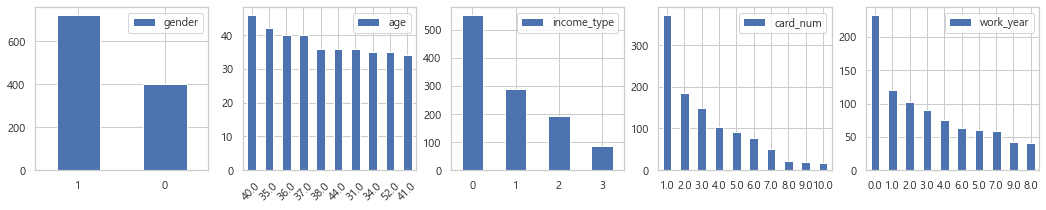

In [143]:
plt.figure(figsize=(18, 3))

plt.subplot(151)
user_list.query('credit == 0')['gender'].value_counts().plot(kind ='bar', rot = 0)
plt.legend()
#남성 : 0, 여성 : 1

plt.subplot(152)
user_list.query('credit == 0')['age'].value_counts().head(10).plot(kind ='bar', rot = 45)
plt.legend()

plt.subplot(153)
user_list.query('credit == 0')['income_type'].value_counts().head(10).plot(kind ='bar', rot = 0)
plt.legend()

plt.subplot(154)
user_list.query('credit == 0')['card_num'].value_counts().head(10).plot(kind ='bar', rot = 0)
plt.legend()
#Working : 0, Commercial associate : 1, Pensioner : 2, State servant : 3, Student : 4

plt.subplot(155)
user_list.query('credit == 0')['work_year'].value_counts().head(10).plot(kind ='bar', rot = 0)
plt.legend()

In [146]:
user_list.query('credit == 0')['begin_month'].value_counts()

 0.0     76
-1.0     69
-3.0     67
-5.0     57
-6.0     55
         ..
-60.0     3
-51.0     2
-54.0     2
-57.0     2
-58.0     2
Name: begin_month, Length: 61, dtype: int64

In [137]:
user_list.query('income_type == 2').sort_values('work_year')

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ID,card_num,age,work_year
14,1,0,0,0,54000.0,2,Secondary / secondary special,Single / not married,House / apartment,-20132,0,0,0,0,NaN,1.0,0.0,1.0,F & N & N & 0 & 54000.0 & Pensioner & Secondar...,4.0,55.0,0.0
5741,1,0,1,0,175500.0,2,Secondary / secondary special,Married,House / apartment,-20770,0,0,0,0,NaN,2.0,-19.0,2.0,F & N & Y & 0 & 175500.0 & Pensioner & Seconda...,6.0,57.0,0.0
5739,1,0,1,0,157500.0,2,Higher education,Married,House / apartment,-20963,0,0,0,0,NaN,2.0,-19.0,1.0,F & N & Y & 0 & 157500.0 & Pensioner & Higher ...,1.0,57.0,0.0
5735,1,0,1,0,135000.0,2,Higher education,Separated,House / apartment,-20704,0,0,1,0,NaN,1.0,-19.0,2.0,F & N & Y & 0 & 135000.0 & Pensioner & Higher ...,1.0,57.0,0.0
5731,1,0,1,0,112500.0,2,Secondary / secondary special,Married,House / apartment,-21031,0,0,0,0,NaN,2.0,-19.0,1.0,F & N & Y & 0 & 112500.0 & Pensioner & Seconda...,1.0,58.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7238,1,0,1,0,157500.0,2,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,-32.0,2.0,F & N & Y & 0 & 157500.0 & Pensioner & Higher ...,1.0,34.0,4.0
7097,0,0,0,0,247500.0,2,Secondary / secondary special,Single / not married,House / apartment,-15037,-2208,0,0,0,Laborers,1.0,-30.0,2.0,M & N & N & 0 & 247500.0 & Pensioner & Seconda...,1.0,41.0,6.0
7554,1,0,1,2,270000.0,2,Higher education,Single / not married,House / apartment,-10425,-2745,0,0,0,Core staff,3.0,-36.0,2.0,F & N & Y & 2 & 270000.0 & Pensioner & Higher ...,1.0,29.0,8.0
7956,0,1,0,0,292500.0,2,Higher education,Single / not married,House / apartment,-14050,-3680,1,1,0,Laborers,1.0,-41.0,2.0,M & Y & N & 0 & 292500.0 & Pensioner & Higher ...,1.0,38.0,10.0


In [124]:
user_list['credit'].value_counts(normalize=True)

2.0    0.599383
1.0    0.272634
0.0    0.127983
Name: credit, dtype: float64

In [126]:
user_list.query('income_type == 2 & gender == 1 & age < 66 & age > 60')['occyp_type'].value_counts() #['credit'].value_counts(normalize=True)

Series([], Name: occyp_type, dtype: int64)

<AxesSubplot:>

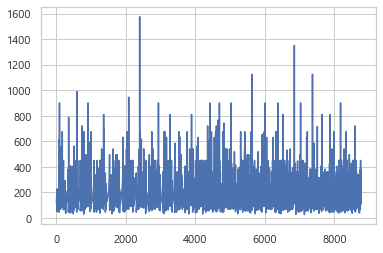

In [118]:
a=(user_list['income_total']/1000).sort_values()
a.sort_index().plot()

<AxesSubplot:>

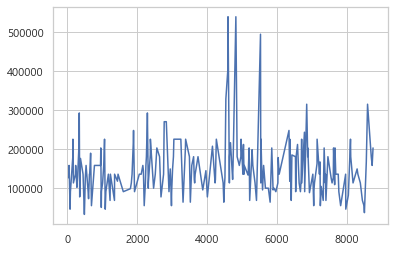

In [107]:
user_list.query('credit == 0 & work_year == 0')['income_total'].sort_index().plot()

In [79]:
user_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8759 entries, 0 to 8758
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         8759 non-null   int64  
 1   car            8759 non-null   int64  
 2   reality        8759 non-null   int64  
 3   child_num      8759 non-null   int64  
 4   income_total   8759 non-null   float64
 5   income_type    8759 non-null   int64  
 6   edu_type       8759 non-null   object 
 7   family_type    8759 non-null   object 
 8   house_type     8759 non-null   object 
 9   DAYS_BIRTH     8759 non-null   int64  
 10  DAYS_EMPLOYED  8759 non-null   int64  
 11  work_phone     8759 non-null   int64  
 12  phone          8759 non-null   int64  
 13  email          8759 non-null   int64  
 14  occyp_type     6078 non-null   object 
 15  family_size    8759 non-null   float64
 16  begin_month    8759 non-null   float64
 17  credit         8759 non-null   float64
 18  ID      

In [74]:
#Working : 0, Commercial associate : 1, Pensioner : 2, State servant : 3, Student : 4
user_list['income_type'] = user_list['income_type'].replace('Working', 0)
user_list['income_type'] = user_list['income_type'].replace('Commercial associate', 1)
user_list['income_type'] = user_list['income_type'].replace('Pensioner', 2)
user_list['income_type'] = user_list['income_type'].replace('State servant', 3)
user_list['income_type'] = user_list['income_type'].replace('Student', 4)
user_list['income_type'].value_counts()

0    4515
1    2066
2    1519
3     656
4       3
Name: income_type, dtype: int64

<AxesSubplot:>

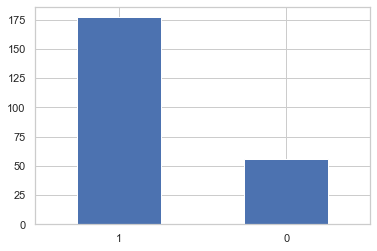

In [85]:
user_list.query('credit == 0 & work_year == 0')['gender'].value_counts().plot(kind ='bar', rot = 0)

In [60]:
user_list.query('credit == 0 & work_year == 0').head(2)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ID,card_num,age,work_year
35,F,N,Y,0,126000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20387,0,0,0,1,NaN,2.0,0.0,0.0,F & N & Y & 0 & 126000.0 & Pensioner & Seconda...,7.0,56.0,0.0
36,F,N,Y,0,126000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-19603,0,0,1,1,NaN,1.0,0.0,0.0,F & N & Y & 0 & 126000.0 & Pensioner & Seconda...,6.0,54.0,0.0


# 가설3. 카드가 많으면 신용도가 떨어질 것이다

In [207]:
user_list.query('card_num == 35')

,Unnamed: 0,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ID,card_num,age
341,341,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519,-3234,0,0,0,Laborers,1.0,-1.0,0.0,F & N & Y & 0 & 297000.0 & Commercial associat...,35.0,43.0


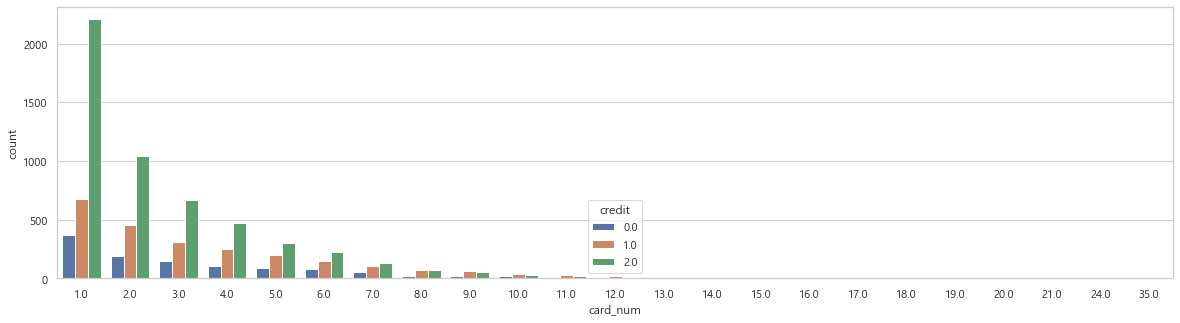

In [206]:
sns.countplot('card_num', data = user_list, hue= 'credit')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 20,5 #countplot은 이렇게 figsize 조정 

plt.show()

# 할것
1. work_year 칼럼 만들기 양수는 0으로 만들어주고 절대값 처리 후 365 나누기(완)
2. 카드 35개 가진 놈 확인 이놈 credit 0임 
3. 카드 1~3개 가진 놈 나이대 확인해보기